# Considerações
* Este código foi altamente baseado na implementação de Roger Bellavista, disponível em https://www.kaggle.com/rogerbellavista/randomforestregressor-mae-0-0922-rmse-0-2314

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# DataSet Read
df = pd.read_csv("../datasets/MiningProcess_Flotation_Plant_Database.csv",decimal=",")

In [43]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,5.530000


In [7]:
df['% Silica Concentrate'].describe()

count    737453.000000
mean          2.326763
std           1.125554
min           0.600000
25%           1.440000
50%           2.000000
75%           3.010000
max           5.530000
Name: % Silica Concentrate, dtype: float64

# Data preparation
* just slipt and remove useless ariables

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

# Delete date (useless) and iron (not in the objectives) columns
df= df.drop(['date', '% Iron Concentrate'], axis=1)

# split 70% of training 30% of test
train, test = train_test_split(df, test_size=0.3)
X_train= train.drop('% Silica Concentrate', axis=1)
y_train= train['% Silica Concentrate']

X_test= test.drop('% Silica Concentrate', axis=1)
y_test= test['% Silica Concentrate']

# Modelo 1: random forrest
* Objetivo: desempenho
* TODOs
  * best prunning
  * Best number of estimators (trade-off performance vs error)
  * need criterion optimization?

In [4]:
# Random Forest
model = RandomForestRegressor()
model.fit(X_train,y_train)

/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Modelo 2: regression tree
* Foco: interpretabilidade
* Depth criteria: interpretable (h=10)

In [35]:
model2 = DecisionTreeRegressor (max_depth=10)
model2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Evaluation 2
* Repeat without % Iron Concentrate
* The features importance are more "distributed"
* The most important is % silica Feed (0.124), Ore Pulp pH (0.121), % iron Feed (0.105)

In [36]:
# TEST SET

y2_hat = model2.predict(X_test)

print ("MAE:                ", metrics.mean_absolute_error(y_test,y2_hat))
print ("RMSE:               ", math.sqrt(metrics.mean_squared_error(y_test,y2_hat)))

# Feature analysis
print ("=====================================")
print ("FEATURE IMPORTANCE:")
for i in range(model2.feature_importances_.size):
    print (X_train.columns[i], "=", model2.feature_importances_[i])

MAE:                 0.6145233972058673
RMSE:                0.8504479462549704
FEATURE IMPORTANCE:
% Iron Feed = 0.09066375867760496
% Silica Feed = 0.14517036286498997
Starch Flow = 0.012582667921359208
Amina Flow = 0.14371543919676932
Ore Pulp Flow = 0.003341621559477964
Ore Pulp pH = 0.08420475373436397
Ore Pulp Density = 0.0514339789145642
Flotation Column 01 Air Flow = 0.021546657771795725
Flotation Column 02 Air Flow = 0.008443222142042826
Flotation Column 03 Air Flow = 0.10706757862968673
Flotation Column 04 Air Flow = 0.11830245754928828
Flotation Column 05 Air Flow = 0.059547787230449595
Flotation Column 06 Air Flow = 0.01666570046294691
Flotation Column 07 Air Flow = 0.0022338043599233045
Flotation Column 01 Level = 0.026321287097961523
Flotation Column 02 Level = 0.005519884691655172
Flotation Column 03 Level = 0.029123788665812025
Flotation Column 04 Level = 0.0021196877867399157
Flotation Column 05 Level = 0.06526969070575665
Flotation Column 06 Level = 0.0054436495228685

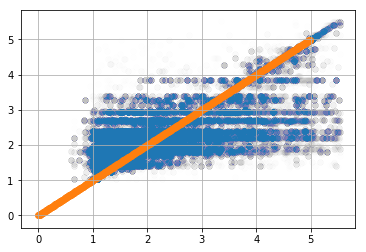

In [37]:
# Previsto vs real
line = np.arange(0, 5, 0.01)

plt.scatter(y_test,y2_hat, Alpha=0.002)
plt.scatter(line,line)
plt.grid(True)

Text(0.5, 0, '% Iron Feed')

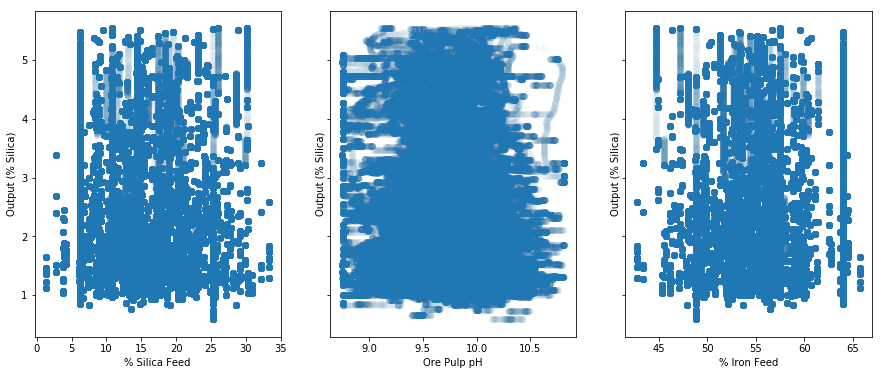

In [9]:
# Plot das 3 variáveis mais importantes 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.scatter(X2['% Silica Feed'],y2, Alpha=0.02)
ax1.set_ylabel ('Output (% Silica)')
ax1.set_xlabel ('% Silica Feed')
ax2.scatter(X2['Amina Flow'],y2, Alpha=0.02)
ax2.set_ylabel ('Output (% Silica)')
ax2.set_xlabel ('Ore Pulp pH')
ax3.scatter(X2['Flotation Column 04 Air Flow'],y2, Alpha=0.02)
ax3.set_ylabel ('Output (% Silica)')
ax3.set_xlabel ('% Iron Feed')

Text(0.5, 0, 'Flotation Column 01 Level')

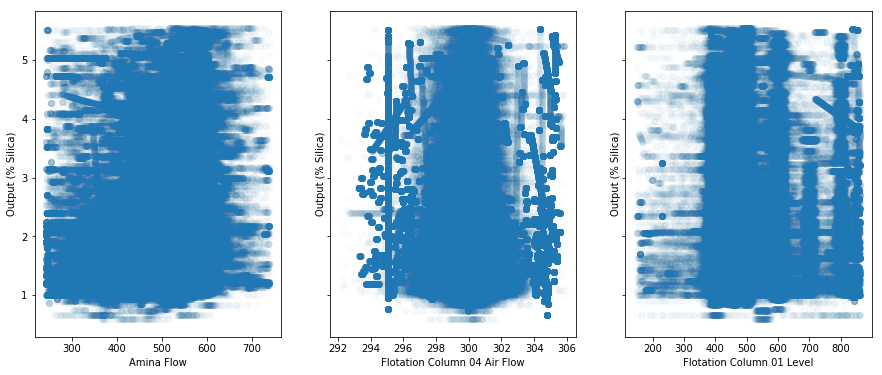

In [10]:
# Plot das proximas 3 variáveis "mais" importantes 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.scatter(X2['Amina Flow'],y2, Alpha=0.02)
ax1.set_ylabel ('Output (% Silica)')
ax1.set_xlabel ('Amina Flow')
ax2.scatter(X2['Flotation Column 04 Air Flow'],y2, Alpha=0.02)
ax2.set_ylabel ('Output (% Silica)')
ax2.set_xlabel ('Flotation Column 04 Air Flow')
ax3.scatter(X2['Flotation Column 01 Level'],y2, Alpha=0.02)
ax3.set_ylabel ('Output (% Silica)')
ax3.set_xlabel ('Flotation Column 01 Level')

In [ ]:
X2= train.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y2= train['% Silica Concentrate']


plt.scatter(X2['% Silica Feed'],X2['Ore Pulp pH'], Alpha=0.5, c=y2)

# Interpretation

In [32]:
from sklearn.tree import export_graphviz

In [59]:

# Export as dot file
export_graphviz (model2, out_file='tree.dot', 
                feature_names = X_train.columns,
                rounded = True, 
                proportion = False,
                precision = 2,
                filled = True,
                impurity=False,
                label='all'
                )

In [5]:
d1, d2 = train_test_split(df, test_size=0.15)

In [28]:
d2['% Silica Feed'].count()

36873

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

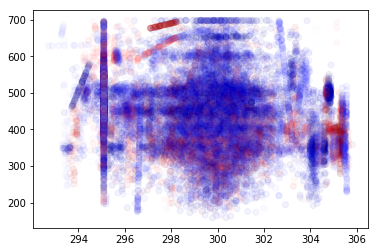

In [47]:
plt.scatter (d2['Flotation Column 04 Air Flow'], d2['Flotation Column 06 Level'], c=d2['% Silica Concentrate'], cmap='seismic',alpha=0.05)

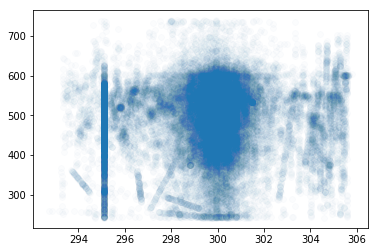

In [58]:
plt.scatter (d2['Flotation Column 04 Air Flow'], d2['Amina Flow'],alpha=0.015)

Text(0, 0.5, 'X2 (Ore Pulp pH)')

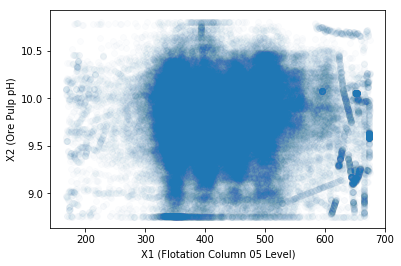

In [7]:
plt.scatter (d2['Flotation Column 05 Level'], d2['Ore Pulp pH'],alpha=0.015)
plt.xlabel("X1 (Flotation Column 05 Level)")
plt.ylabel("X2 (Ore Pulp pH)")

Text(0.5, 0, 'Amina Flow')

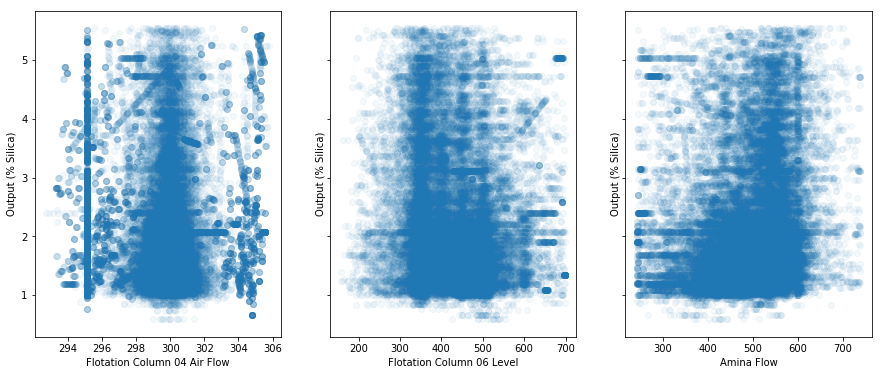

In [44]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.scatter(d2['Flotation Column 04 Air Flow'],d2['% Silica Concentrate'], Alpha=0.05)
ax1.set_ylabel ('Output (% Silica)')
ax1.set_xlabel ('Flotation Column 04 Air Flow')
ax2.scatter(d2['Flotation Column 06 Level'],d2['% Silica Concentrate'], Alpha=0.05)
ax2.set_ylabel ('Output (% Silica)')
ax2.set_xlabel ('Flotation Column 06 Level')
ax3.scatter(d2['Amina Flow'],d2['% Silica Concentrate'], Alpha=0.05)
ax3.set_ylabel ('Output (% Silica)')
ax3.set_xlabel ('Amina Flow')